              precision    recall  f1-score   support

           2       1.00      0.67      0.80         3
           3       0.50      0.21      0.29        24
           4       0.71      0.84      0.77       187
           5       0.67      0.54      0.60        98

    accuracy                           0.70       312
   macro avg       0.72      0.57      0.62       312
weighted avg       0.69      0.70      0.68       312


Accuracy: 0.6987
Confusion Matrix:
 [[  2   1   0   0]
 [  0   5  18   1]
 [  0   4 158  25]
 [  0   0  45  53]]
                     feature  importance
5    sign marking & lighting    0.265504
4         Pavement condition    0.224239
6      traffic control & law    0.167618
7           traffic movement    0.113918
3        weather environment    0.075879
8        Pedestrian activity    0.067305
1    Bikers driving behavior    0.033220
0  Perceived \nEndangerment     0.027677
2        motorbike condition    0.024641


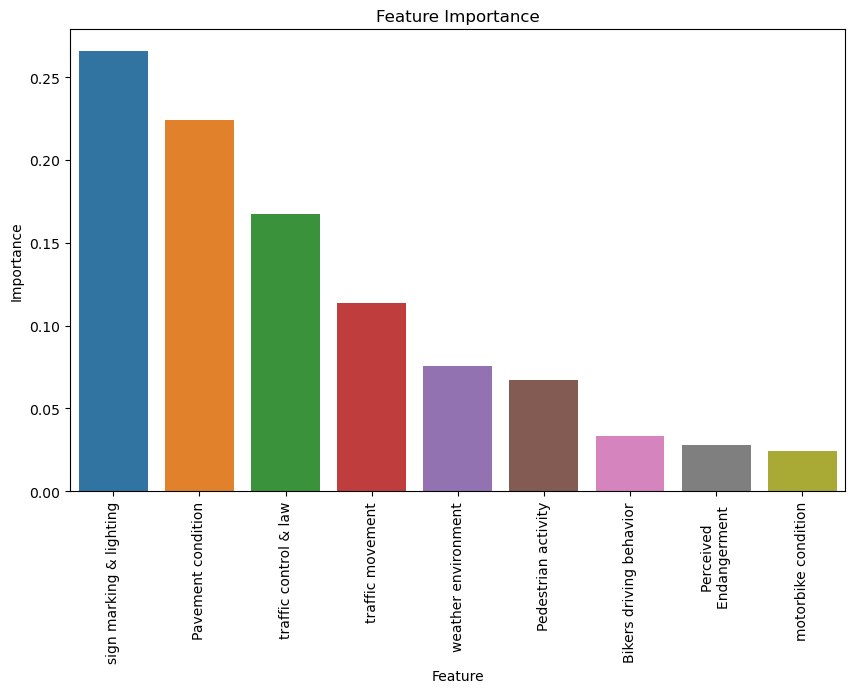

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.tree import plot_tree
import pickle

df=pd.read_csv('E:\\thesis\\N.csv')

df['bikersatt']=(df['Mobile / Streaming']+df['Drug Addiction ']+df['Overtaking ']+df[ 'Competitive riding ']+df['Traffic Law Disregard']+df['Inexperience ']+df['Overconfidence']+df['Overspeed ']+df['Panic Braking '])/9
def bike(df):
    if df['bikersatt']>0 and df['bikersatt']<=1:
        return 1
    elif df['bikersatt']>1 and df['bikersatt']<=2:
        return 2
    elif df['bikersatt']>2 and df['bikersatt']<=3:
        return 3
    elif df['bikersatt']>3 and df['bikersatt']<=4:
        return 4
    elif df['bikersatt']>4 and df['bikersatt']<=5:
        return 5
df['Bikers driving behavior']=df.apply(lambda df:bike(df),axis=1) 
df['condition']=(df['More Cc Bike']+df['Mechanical Problem']+df['Overloading']+df['Travel Distance '])/4
def m(df):
    if df['condition']>0 and df['condition']<=1:
        return 1
    elif df['condition']>1 and df['condition']<=2:
        return 2
    elif df['condition']>2 and df['condition']<=3:
        return 3
    elif df['condition']>3 and df['condition']<=4:
        return 4
    elif df['condition']>4 and df['condition']<=5:
        return 5
df['motorbike condition']=df.apply(lambda df:m(df),axis=1)
df['w']=(df['Rainy weather ']+df['Fog & dust']+df['High temperature '])/3
def n(df):
    if df['w']>0 and df['w']<=1:
        return 1
    elif df['w']>1 and df['w']<=2:
        return 2
    elif df['w']>2 and df['w']<=3:
        return 3
    elif df['w']>3 and df['w']<=4:
        return 4
    elif df['w']>4 and df['w']<=5:
        return 5
       
df['weather environment']=df.apply(lambda df:n(df),axis=1)
df['DE']=(df['Flyover, bridge, culvert']+df['Turn, bend, curve ']+df['Divider, Median, \nGuardrail  ']+df['Problematic \nCurb'])/4
def o(df):
    if df['DE']>0 and  df['DE']<=1:
        return 1
    elif df['DE']>1 and  df['DE']<=2:
        return 2
    elif df['DE']>2 and  df['DE']<=3:
        return 3
    elif df['DE']>3 and  df['DE']<=4:
        return 4
    elif df['DE']>4 and  df['DE']<=5:
        return 5
        
df['Driving Environment']=df.apply(lambda df:o(df),axis=1)
df['P']=(df['DistressDrainage ']+df['Level crossing \nproblems'])/2
def q(df):
    if df['P']>0 and df['P']<=1:
        return 1
    elif df['P']>1 and df['P']<=2:
        return 2
    elif df['P']>2 and df['P']<=3:
        return 3
    elif df['P']>3 and df['P']<=4:
        return 4
    elif df['P']>4 and df['P']<=5:
        return 5
        
        
df['Pavement condition']=df.apply(lambda df:q(df),axis=1)
df['S']=(df['Lighting problem ']+df['SignMarking'])/2
def a(df):
    if df['S']>0 and df['S']<=1:
        return 1
    elif df['S']>1 and df['S']<=2:
        return 2
    elif df['S']>2 and df['S']<=3:
        return 3
    elif df['S']>3 and df['S']<=4:
        return 4
    elif df['S']>4 and df['S']<=5:
        return 5
df['sign marking & lighting']=df.apply(lambda df:a(df),axis=1)
df['R']=(df['Law enforcement ']+df['Haphazard Parking, Stoppage']+df['Non lane  Heterogenous\n Traffic']+df['Intersection problem '])/4
def b(df):
    if df['R']>0 and df['R']<=1:
        return 1
    elif df['R']>1 and df['R']<=2:
        return 2
    elif df['R']>2 and df['R']<=3:
        return 3
    elif df['R']>3 and df['R']<=4:
        return 4
    elif df['R']>4 and df['R']<=5:
        return 5
      
df['traffic control & law']=df.apply(lambda df:b(df),axis=1)
df['M']=(df['Right Turn, \nmerge movements']+df['Frequent side \nroad entry ']+df['Cut in movement ']+df['Cut out movement ']+df['Two way \ntraffic movement '])/5
def c(df):
    if df['M']>0 and df['M']<=1:
        return 1
    elif df['M']>1 and df['M']<=2:
        return 2
    elif df['M']>2 and df['M']<=3:
        return 3
    elif df['M']>3 and df['M']<=4:
        return 4
    elif df['M']>4 and df['M']<=5:
        return 5
     
df['traffic movement']=df.apply(lambda df:c(df),axis=1)
df['Ped']=(df['Footpath Inadequacy\n']+df['Pedestrian along with traffic direction \n']+df['\nPedestrian facing with Traffic Direction\n']+df['Pedestrian crossing \n'])/4
def b(df):
    if df['Ped']>0 and df['Ped']<=1:
        return 1
    elif df['Ped']>1 and df['Ped']<=2:
        return 2
    elif df['Ped']>2 and df['Ped']<=3:
        return 3
    elif df['Ped']>3 and df['Ped']<=4:
        return 4
    elif df['Ped']>4 and df['Ped']<=5:
        return 5
      
df['Pedestrian activity']=df.apply(lambda df:b(df),axis=1)

df=df.drop(['bikersatt','condition','w','R','P','S','DE','M','Ped'],axis=1)
df=df.drop(['More Cc Bike', 'Mechanical Problem', 'Mobile / Streaming',
       'Overloading', 'Drug Addiction ', 'Overtaking ',
       'Traffic Law Disregard', 'Inexperience ', 'Overconfidence',
       'Overspeed ', 'Panic Braking ', 'Footpath Inadequacy\n',
       'Crash/Conflict Experience', 'Rainy weather ', 'Fog & dust',
       'High temperature ', 'DistressDrainage ', 'Lighting problem ',
       'Intersection problem ', 'Level crossing \nproblems',
       'Turn, bend, curve ', 'Flyover, bridge, culvert', 'SignMarking',
       'Divider, Median, \nGuardrail  ', 'Non lane  Heterogenous\n Traffic',
       'Haphazard Parking, Stoppage', 'Right Turn, \nmerge movements',
       'Frequent side \nroad entry ', 'Cut in movement ',
       'Two way \ntraffic movement ', 'Law enforcement ',
       'Pedestrian along with traffic direction \n', 'Pedestrian crossing \n',
       '\nPedestrian facing with Traffic Direction\n', 'Competitive riding ',
       'Travel Distance ', 'Unsmooth transitions\n of Flyovers',
       'Problematic \nCurb', 'Cut out movement '],axis=1)
x=df[['Perceived \nEndangerment ', 'Bikers driving behavior',
       'motorbike condition', 'weather environment',
       'Pavement condition', 'sign marking & lighting',
       'traffic control & law', 'traffic movement', 'Pedestrian activity']]
y=df['Driving Environment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=3)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
proba_predictions = rf.predict_proba(x_test)

importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': x_train.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)
plt.figure(figsize=(10,6))
sns.barplot(x='feature', y='importance', data=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()




In [2]:
y_pred

array([4, 4, 4, 4, 4, 5, 5, 4, 5, 5, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       3, 5, 2, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 4, 4, 5, 4, 4, 5, 3, 3, 4, 5, 4, 3, 4, 4, 5, 4, 4, 4, 4,
       5, 4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 4, 5, 4, 5, 4, 4, 4, 5, 5, 4, 5,
       4, 5, 5, 4, 4, 4, 4, 3, 5, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 5, 4, 5, 5, 4, 4, 4, 4, 3, 4, 4, 5, 5, 4,
       4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 5, 4, 5, 5,
       4, 4, 4, 5, 5, 4, 5, 5, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 3, 4, 4, 5,
       4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4,
       4, 4, 5, 4, 4, 5, 4, 4, 5, 5, 5, 5, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4,
       4, 4, 5, 4, 4, 4, 4, 4, 4, 5, 4, 5, 4, 5, 4, 4, 4, 5, 4, 4, 4, 4,
       4, 4, 5, 5, 4, 4, 5, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 5, 4, 5, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 5, 4, 5, 5, 5, 4, 4, 4, 4, 4,

In [3]:
df

,Perceived \nEndangerment,Bikers driving behavior,motorbike condition,weather environment,Driving Environment,Pavement condition,sign marking & lighting,traffic control & law,traffic movement,Pedestrian activity
0,5,5,4,4,5,4,4,5,4,4
1,3,5,4,4,3,3,3,3,4,3
2,4,5,3,4,4,4,3,4,3,3
3,4,5,4,4,5,5,5,5,5,5
4,5,5,4,3,4,4,3,4,4,3
...,...,...,...,...,...,...,...,...,...,...
1554,1,2,3,4,4,4,4,5,4,2
1555,4,5,5,4,4,4,4,5,5,5
1556,2,2,4,2,5,4,2,4,4,2
1557,4,5,3,4,4,4,3,4,4,4


In [4]:
df.to_csv('my_dataframe.csv', index=False)

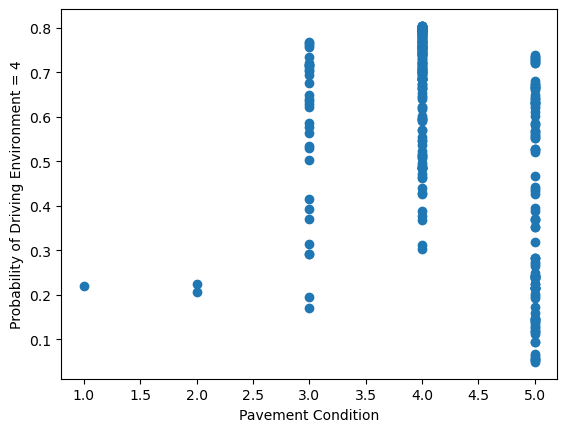

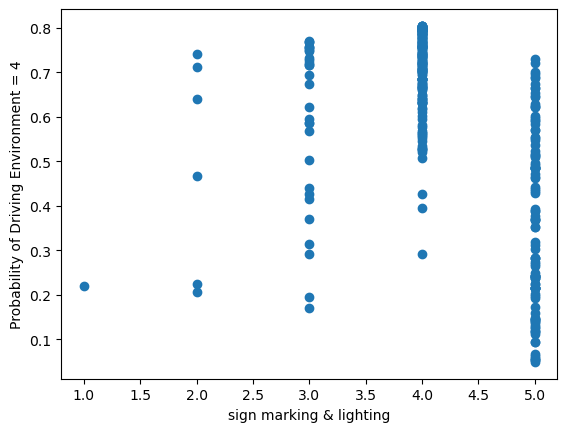

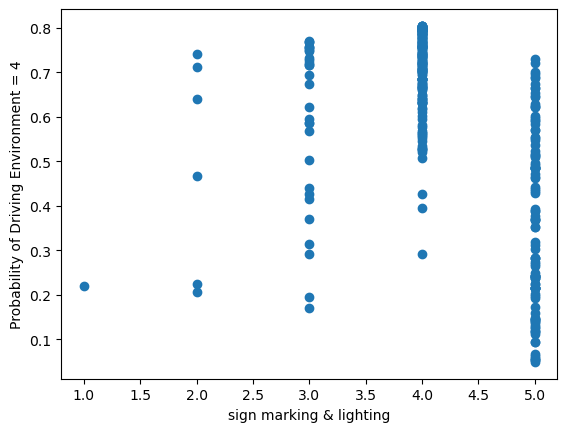

Index(['Perceived \nEndangerment ', 'Bikers driving behavior',
       'motorbike condition', 'weather environment', 'Driving Environment',
       'Pavement condition', 'sign marking & lighting',
       'traffic control & law', 'traffic movement', 'Pedestrian activity'],
      dtype='object')

In [5]:
proba_predictions = rf.predict_proba(x_test)
plt.scatter(x_test['Pavement condition'], proba_predictions[:,3])
plt.xlabel('Pavement Condition')
plt.ylabel('Probability of Driving Environment = 4')
plt.show()
plt.scatter(x_test['sign marking & lighting'], proba_predictions[:,3])
plt.xlabel('sign marking & lighting')
plt.ylabel('Probability of Driving Environment = 4')
plt.show()
plt.scatter(x_test['sign marking & lighting'], proba_predictions[:,3])
plt.xlabel('sign marking & lighting')
plt.ylabel('Probability of Driving Environment = 4')
plt.show()
df.columns

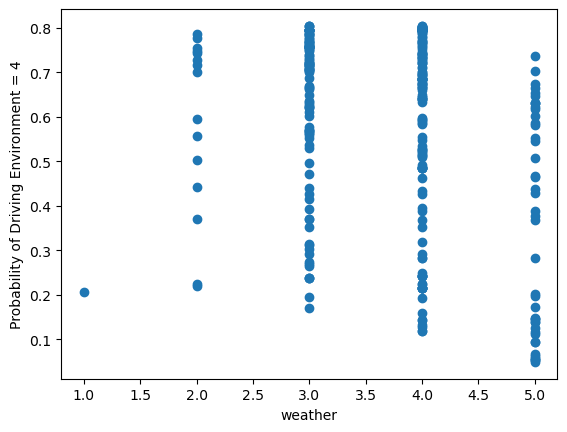

In [6]:
plt.scatter(x_test['weather environment'], proba_predictions[:,3])
plt.xlabel('weather')
plt.ylabel('Probability of Driving Environment = 4')
plt.show()

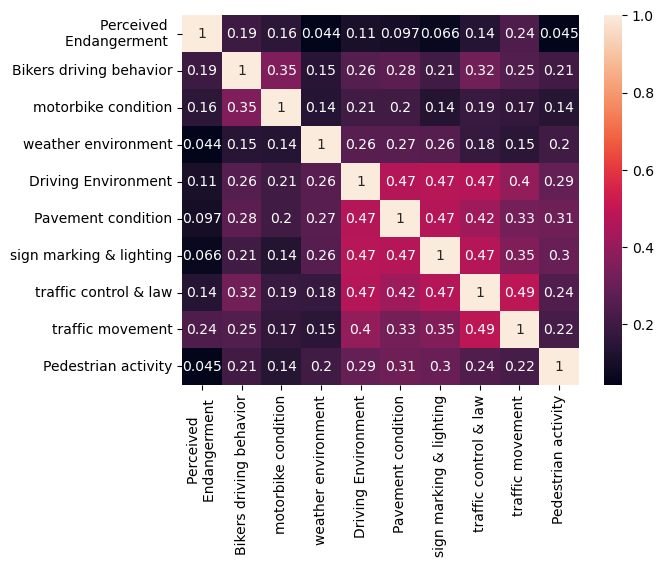

In [7]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

                     feature  importance
5    sign marking & lighting    0.265504
4         Pavement condition    0.224239
6      traffic control & law    0.167618
7           traffic movement    0.113918
3        weather environment    0.075879
8        Pedestrian activity    0.067305
1    Bikers driving behavior    0.033220
0  Perceived \nEndangerment     0.027677
2        motorbike condition    0.024641


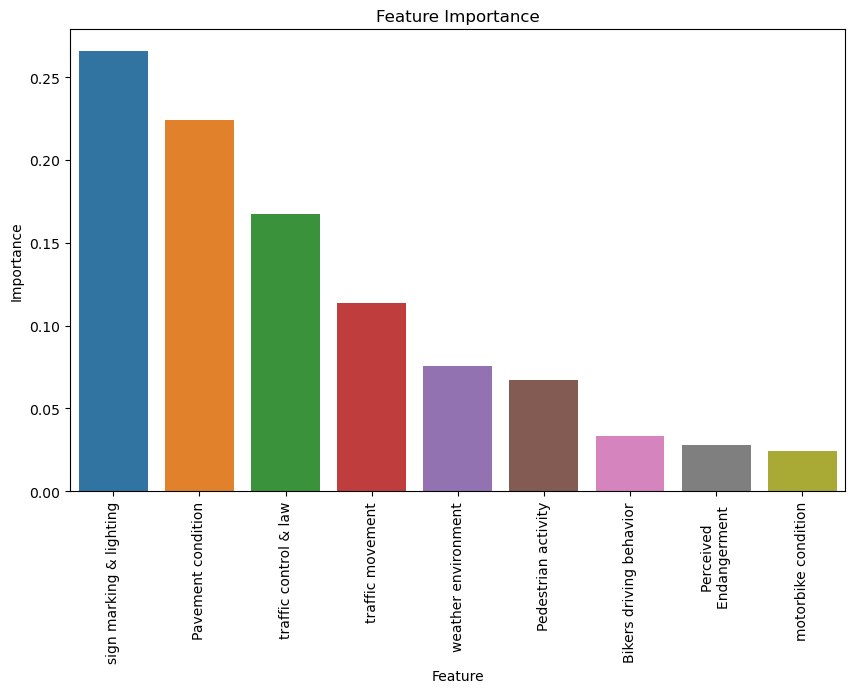

In [8]:
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': x_train.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)
plt.figure(figsize=(10,6))
sns.barplot(x='feature', y='importance', data=feature_importances)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

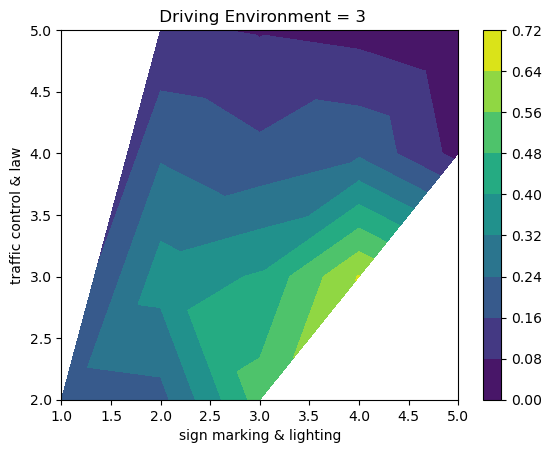

In [9]:
import scipy.interpolate
x = x_test['sign marking & lighting']  
y = x_test['traffic control & law']  


proba_predictions_5 = proba_predictions[:,2]  


plt.tricontourf(x,y,proba_predictions_5, cmap='viridis')
plt.colorbar()
plt.xlabel('sign marking & lighting')  
plt.ylabel('traffic control & law')  
plt.title(' Driving Environment = 3')  
plt.show()

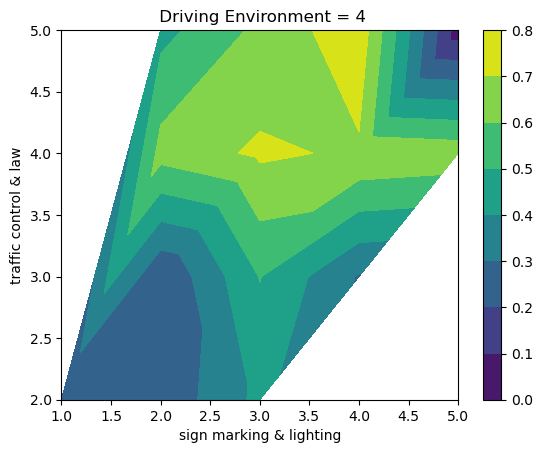

0.8045586528956227


In [10]:
import scipy.interpolate
x = x_test['sign marking & lighting']  
y = x_test['traffic control & law']  


proba_predictions_5 = proba_predictions[:,3]  

plt.tricontourf(x,y,proba_predictions_5,cmap='viridis')
plt.colorbar()
plt.xlabel('sign marking & lighting')  
plt.ylabel('traffic control & law')  
plt.title(' Driving Environment = 4')  
plt.show()
max_value = np.max(proba_predictions_5)
print(max_value)

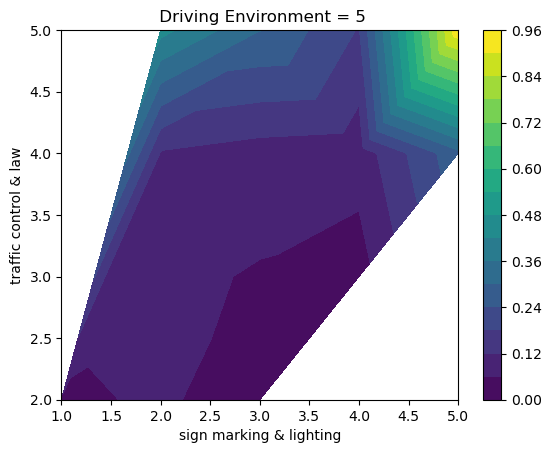

In [11]:
import scipy.interpolate
x = x_test['sign marking & lighting']  
y = x_test['traffic control & law']  


proba_predictions_5 = proba_predictions[:,4]  

plt.tricontourf(x,y,proba_predictions_5,cmap='viridis',levels=15,vmax=np.max(proba_predictions_5))
plt.colorbar()
plt.xlabel('sign marking & lighting')  
plt.ylabel('traffic control & law')  
plt.title(' Driving Environment = 5')  
plt.show()

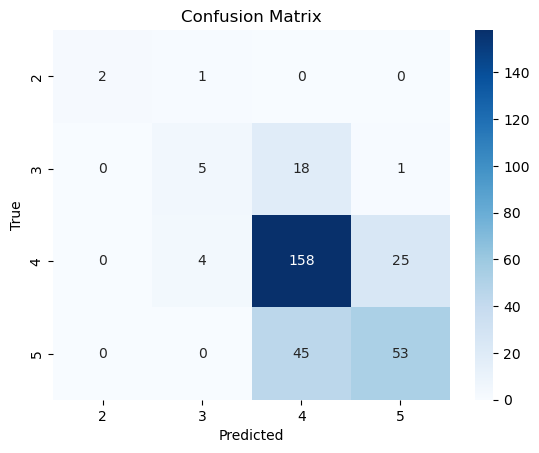

In [12]:
class_labels = ['2', '3', '4', '5']

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.xticks(np.arange(len(class_labels))+0.5, class_labels)
plt.yticks(np.arange(len(class_labels))+0.5, class_labels[::1])

plt.show()

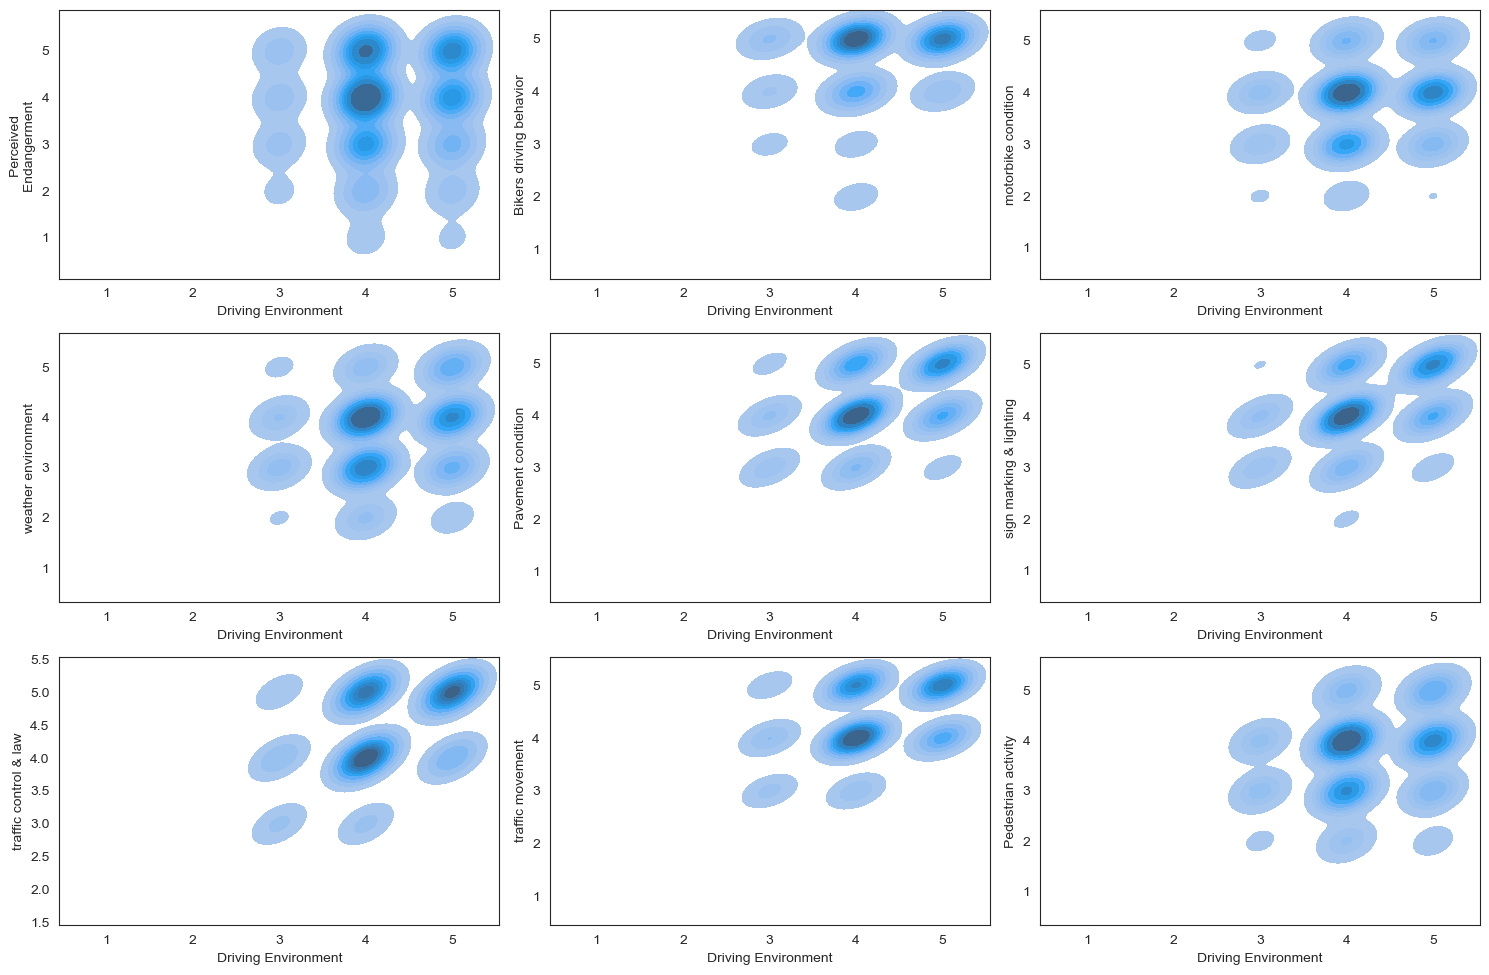

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")

# create a list of variables to plot
y_vars = ['Perceived \nEndangerment ', 'Bikers driving behavior', 'motorbike condition',
          'weather environment', 'Pavement condition', 'sign marking & lighting',
          'traffic control & law', 'traffic movement', 'Pedestrian activity']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, var in enumerate(y_vars):
    row, col = divmod(i, 3)
    sns.kdeplot(data=df, x='Driving Environment', y=var, shade=True, ax=axes[row][col])
    axes[row][col].set_ylabel(var)
    axes[row][col].set_xlabel('Driving Environment')
    axes[row][col].set_title('')
    
plt.suptitle('')
plt.tight_layout()
plt.show()